# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [1]:
# Imports here
import os
import matplotlib.pyplot as plt
import torch
from torchvision import datasets,transforms,models
import torchvision
from torch import nn,optim,utils
import torch.utils.data as data
from PIL import Image
import numpy as np

## Load the data

Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). The data should be included alongside this notebook, otherwise you can [download it here](https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz). The dataset is split into three parts, training, validation, and testing. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. You'll also need to make sure the input data is resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks you'll use were trained on the ImageNet dataset where each color channel was normalized separately. For all three sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.
 

In [2]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [3]:
# TODO: Define your transforms for the training, validation, and testing sets
data_transforms = {'train':transforms.Compose([transforms.Resize(256),
                                               transforms.RandomResizedCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
                   'valid':transforms.Compose([transforms.Resize(256),
                                               transforms.CenterCrop(224),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
                   'test':transforms.Compose([transforms.Resize(256),
                                              transforms.CenterCrop(224),
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])}

# TODO: Load the datasets with ImageFolder
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid','test']} 

# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloaders = {x:utils.data.DataLoader(image_datasets[x],batch_size=32,shuffle=True) for x in ['train','valid','test']}

### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [4]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! You can also ask questions on the forums or join the instructors in office hours.

Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

In [5]:
# TODO: Build and train your network
model = models.vgg19(pretrained=True)
for param in model.parameters():
    param.requires_grad=False
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [6]:
num_features = model.classifier[0].in_features
print(num_features)

25088


In [7]:
# add classifier
classifier = nn.Sequential(nn.Linear(num_features, 4096),
                           nn.ReLU(True),
                           nn.Dropout(p=0.5),
                           nn.Linear(4096, 4096),
                           nn.ReLU(True),
                           nn.Dropout(p=0.5),
                           nn.Linear(4096, 102))

model.classifier=classifier


In [8]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

## Testing your network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [9]:
# TODO: Do validation on the test set
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(list(filter(lambda p: p.requires_grad, model.parameters())), lr=0.001, momentum=0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  

epochs=15
print_every=5
steps=0

model.to('cuda')

 
# Calculate dataset sizes.
dataset_sizes = {x: len(dataloaders[x].dataset) for x in list(image_datasets.keys())} 
for e in range(epochs):
    
    print('Epoch {}/{}'.format(epochs, e+1))
    print('-' * 10)
    
    for phase in ['train', 'valid']:
        if phase == 'train':
            exp_lr_scheduler.step()
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluate mode
            
        running_loss=0.0
        running_corrects =0
        steps=0
        
        for inputs,labels in dataloaders[phase]:
            steps+=1
            inputs=inputs.to('cuda')
            labels=labels.to('cuda')
        
            optimizer.zero_grad()
        
            with torch.set_grad_enabled(phase=='train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss=criterion(outputs,labels)
                
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                    
                    
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
         
            if steps%print_every==0:
                print("Epoch: {}/{}... ".format(e+1,epochs),"Loss:{:.4f}".format(running_loss/(steps*inputs.size(0))),"Acc:{:.4f}".format(running_corrects.double()/(steps*inputs.size(0))))
        
        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        
        print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


Epoch 15/1
----------
Epoch: 1/15...  Loss:4.6366 Acc:0.0000
Epoch: 1/15...  Loss:4.6304 Acc:0.0063
Epoch: 1/15...  Loss:4.6166 Acc:0.0187
Epoch: 1/15...  Loss:4.6126 Acc:0.0234
Epoch: 1/15...  Loss:4.6078 Acc:0.0238
Epoch: 1/15...  Loss:4.6009 Acc:0.0229
Epoch: 1/15...  Loss:4.5923 Acc:0.0250
Epoch: 1/15...  Loss:4.5848 Acc:0.0258
Epoch: 1/15...  Loss:4.5774 Acc:0.0312
Epoch: 1/15...  Loss:4.5686 Acc:0.0306
Epoch: 1/15...  Loss:4.5599 Acc:0.0318
Epoch: 1/15...  Loss:4.5495 Acc:0.0365
Epoch: 1/15...  Loss:4.5408 Acc:0.0380
Epoch: 1/15...  Loss:4.5317 Acc:0.0402
Epoch: 1/15...  Loss:4.5218 Acc:0.0404
Epoch: 1/15...  Loss:4.5208 Acc:0.0398
Epoch: 1/15...  Loss:4.5136 Acc:0.0382
Epoch: 1/15...  Loss:4.5022 Acc:0.0399
Epoch: 1/15...  Loss:4.4956 Acc:0.0398
Epoch: 1/15...  Loss:4.4865 Acc:0.0431
Epoch: 1/15...  Loss:4.4807 Acc:0.0446
Epoch: 1/15...  Loss:4.4789 Acc:0.0443
Epoch: 1/15...  Loss:4.4730 Acc:0.0467
Epoch: 1/15...  Loss:4.4683 Acc:0.0479
Epoch: 1/15...  Loss:4.4620 Acc:0.0493
Epo

Epoch: 5/15...  Loss:1.5238 Acc:0.6042
Epoch: 5/15...  Loss:1.5226 Acc:0.6043
Epoch: 5/15...  Loss:1.5225 Acc:0.6050
Epoch: 5/15...  Loss:1.5253 Acc:0.6042
Epoch: 5/15...  Loss:1.5183 Acc:0.6068
Epoch: 5/15...  Loss:1.5132 Acc:0.6079
Epoch: 5/15...  Loss:1.5145 Acc:0.6073
Epoch: 5/15...  Loss:1.5126 Acc:0.6080
Epoch: 5/15...  Loss:1.5143 Acc:0.6079
Epoch: 5/15...  Loss:1.5073 Acc:0.6074
Epoch: 5/15...  Loss:1.5081 Acc:0.6067
Epoch: 5/15...  Loss:1.5038 Acc:0.6060
Epoch: 5/15...  Loss:1.4989 Acc:0.6054
Epoch: 5/15...  Loss:1.4932 Acc:0.6065
Epoch: 5/15...  Loss:1.4969 Acc:0.6049
Epoch: 5/15...  Loss:1.5004 Acc:0.6059
Epoch: 5/15...  Loss:1.4946 Acc:0.6081
Epoch: 5/15...  Loss:1.4945 Acc:0.6077
Epoch: 5/15...  Loss:1.4926 Acc:0.6082
Epoch: 5/15...  Loss:1.4892 Acc:0.6093
Epoch: 5/15...  Loss:1.4869 Acc:0.6094
Epoch: 5/15...  Loss:1.4773 Acc:0.6119
Epoch: 5/15...  Loss:1.4727 Acc:0.6138
Epoch: 5/15...  Loss:1.9577 Acc:0.8197
train Loss: 1.4701 Acc: 0.6155
Epoch: 5/15...  Loss:0.7590 Acc:0

Epoch: 9/15...  Loss:0.9540 Acc:0.7470
Epoch: 9/15...  Loss:0.9545 Acc:0.7468
Epoch: 9/15...  Loss:0.9551 Acc:0.7469
Epoch: 9/15...  Loss:0.9574 Acc:0.7462
Epoch: 9/15...  Loss:0.9562 Acc:0.7466
Epoch: 9/15...  Loss:1.2735 Acc:0.9937
train Loss: 0.9563 Acc: 0.7462
Epoch: 9/15...  Loss:0.6065 Acc:0.8063
Epoch: 9/15...  Loss:0.5779 Acc:0.8281
Epoch: 9/15...  Loss:0.5416 Acc:0.8375
Epoch: 9/15...  Loss:0.5306 Acc:0.8422
Epoch: 9/15...  Loss:0.5276 Acc:0.8513
valid Loss: 0.5353 Acc: 0.8496
Epoch 15/10
----------
Epoch: 10/15...  Loss:0.9983 Acc:0.7625
Epoch: 10/15...  Loss:1.0761 Acc:0.7344
Epoch: 10/15...  Loss:1.0747 Acc:0.7208
Epoch: 10/15...  Loss:0.9986 Acc:0.7359
Epoch: 10/15...  Loss:1.0210 Acc:0.7350
Epoch: 10/15...  Loss:1.0037 Acc:0.7354
Epoch: 10/15...  Loss:0.9895 Acc:0.7366
Epoch: 10/15...  Loss:0.9819 Acc:0.7414
Epoch: 10/15...  Loss:0.9755 Acc:0.7389
Epoch: 10/15...  Loss:0.9517 Acc:0.7450
Epoch: 10/15...  Loss:0.9467 Acc:0.7472
Epoch: 10/15...  Loss:0.9622 Acc:0.7432
Epoch:

KeyboardInterrupt: 

## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [ ]:
model.class_to_idx = image_datasets['train'].class_to_idx

checkpoint = {
    'class_to_idx': model.class_to_idx, 
    'state_dict': model.state_dict()
}


In [18]:
# TODO: Save the checkpoint 
torch.save(checkpoint,'checkpoint.pth')

## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [19]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

def load_rebuilds(path):
    model = models.vgg19(pretrained=True)
    for param in model.parameters():
        param.requires_grad=False

    # add classifier
    classifier = nn.Sequential(nn.Linear(num_features, 4096),
                           nn.ReLU(True),
                           nn.Dropout(p=0.5),
                           nn.Linear(4096, 4096),
                           nn.ReLU(True),
                           nn.Dropout(p=0.5),
                           nn.Linear(4096, 102))

    model.classifier=classifier
    
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    return model

In [16]:
model = load_rebuilds('checkpoint.pth')
print(model)

NameError: name 'load_rebuilds' is not defined

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [36]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    data_transforms = transforms.Compose([
        transforms.Resize(256), 
        transforms.CenterCrop(224), 
        transforms.ToTensor()])
    
    im = Image.open(image)
    im = data_transforms(im).float()
    
    np_Image = np.array(im)    
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_Image = (np.transpose(np_Image, (1, 2, 0)) - mean)/std    
    np_Image = np.transpose(np_Image, (2, 0, 1))
            
    return np_Image

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [37]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
#     image = image.numpy().transpose((1, 2, 0))
    image = np.transpose(image,(1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

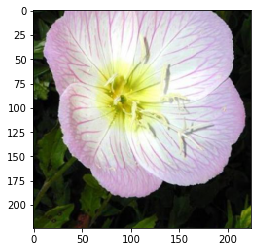

In [38]:
imshow(process_image('flowers/test/1/image_06743.jpg'))

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [47]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # TODO: Implement the code to predict the class from an image file
    model.cuda()
    model.eval()
    image=process_image(image_path)
    image = torch.autograd.Variable(torch.FloatTensor(image), requires_grad=True)
    image = image.unsqueeze(0)
    
    image = image.cuda()

    result = model(image).topk(topk)
    
    probs = torch.nn.functional.softmax(result[0].data, dim=1).cpu().numpy()[0]
    classes = result[1].data.cpu().numpy()[0]

    labels = list(cat_to_name.values())
#     classes = [labels[x] for x in classes]
    model.train(mode=model.training)

    return probs,classes

In [48]:
probs,classes = predict('flowers/valid/10/image_07107.jpg',model)
print(probs)
print(classes)

[9.9998200e-01 1.0464923e-05 6.5851241e-06 8.9236136e-07 1.2447200e-07]
[ 1 48 31  8 29]


In [31]:
print(labels)

tensor([ 63,  88,  77])


## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [82]:
import pandas as pd

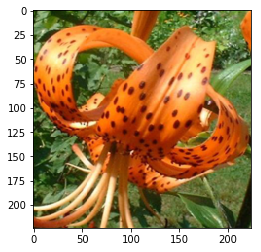

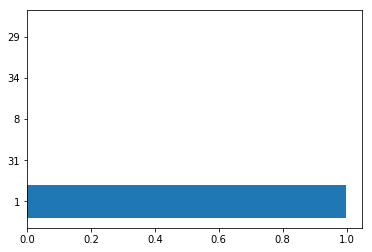

In [83]:
# TODO: Display an image along with the top 5 classes
imshow(process_image('flowers/train/6/image_07164.jpg'))
plt.show()
plt.barh(range(len(probs)), probs,tick_label = classes)
plt.show()